*Wykonała Amelia Bieda 275973*
# Generator ACORN (Additive Congruential Random Number)
Generator ACORN k-tego rzędu oparty jest na ciągach liczbowych zdefiniowanych poprzez równania rekurencyjne:
$X_n^0=X_{n-1}^0,~n\ge 1 \\ X_n^m=(X_n^{m-1}+X_{n-1}^m)\mod M,~m=1,...,k,~n\ge 1 \\ Y_n^k=\frac{X_n^k}M,~n\ge 1.$
Jeśli ziarno (pierwszy element wektora o elementach $X^m_0 \in \{0 . . . M\}$), czyli $X^0_0 \in\{1 . . . M − 1\}$, jest względnie pierwsze z $M$ oraz $M$ jest dostatecznie dużą liczbą naturalną, to generator posiada pożądane cechy a ciąg $Y^k_n$ dla $n \ge 1$ przypomina ciąg IID zmiennych losowych z rozkładu jednostajnego $\cal{U}(0, 1)$.

Zaimplementujemy taki generator jako funkcję **ACORN(N,k,M,Lag)**, zwracającą $N$ liczb pseudolosowych $Y^k_n$, dla $n = 1, . . . , N$, korzystając z algorytmu $k$-tego rzędu, przy ominięciu pierwszych $Lag$ wyrazów. Dla weryfikacji poprawności generatora liczb pseudolosowych sprawdzimy jego histogram, wykres ciągu $Y^k_n$ oraz funkcji$Y^k_{n-1}$ -> $Y^k_n$. Dodatkowo sprawdzimy wydajność generatora ACORN w porównaniu z wbudowanym rozkładem jednostajnym w NumPy.

Użyte biblioteki:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import typing

### Implementacja generatora liczb pseudolosowych

In [2]:
def ACORN(size: int=10**5, k: int=9, M: int=2**61-1, Lag:int=10**3) -> list:
    '''Generator liczb pseudolosowych ACORN o rozkładzie jednostajnym U(0,1).
    Args:
        size (int): ilość liczb pseudolosowych Y (default 10**5).
        k (int): rząd ciągu (default 9).
        M (int): moduł, zazwyczaj potęga dwójki (default 2**61-1).
        Lag (int): wartość pominiętych pierwszych wyrazów (default 10**3). 
    Returns: 
        (list): ciąg liczb pseudolosowych.'''
    
    xs = np.zeros((k + 1, size + Lag), dtype=np.int64)
    xs[0] = 7177
    
    for ks in range(1, k + 1):
        for ns in range(1, size + Lag):
            xs[ks, ns] = (xs[ks - 1, ns] + xs[ks, ns - 1]) % M
            
    result = xs[k, Lag:Lag + size] / M
    
    return result.tolist()

## Sprawdzenie poprawności wyników


In [3]:
acorn_numbers = ACORN(size=10*6)

### Wykres ciągu $Y_n^k$.

Wykres nie ma powtarzających się sekwencji, jest nieregularny, co wskazuje na poprawność generatora liczb.

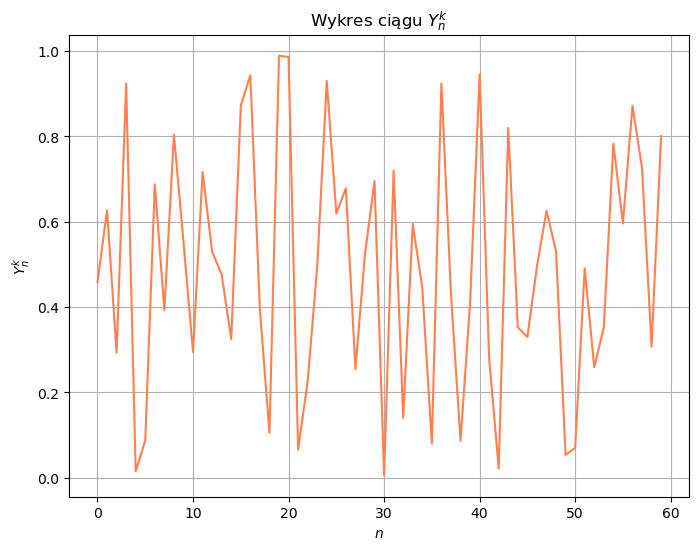

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(acorn_numbers, color='coral')
plt.title('Wykres ciągu $Y_n^k$')

plt.xlabel('$n$')
plt.ylabel('$Y_n^k$')
plt.grid()
plt.show()

### Wykres zależności $Y_{n-1}^k$ -> $Y_n^k$.

Punkty są rozrzucone równomiernie bez widocznych wzorców, oznacza to, że wartości są niezależne i dobrze wymieszane.

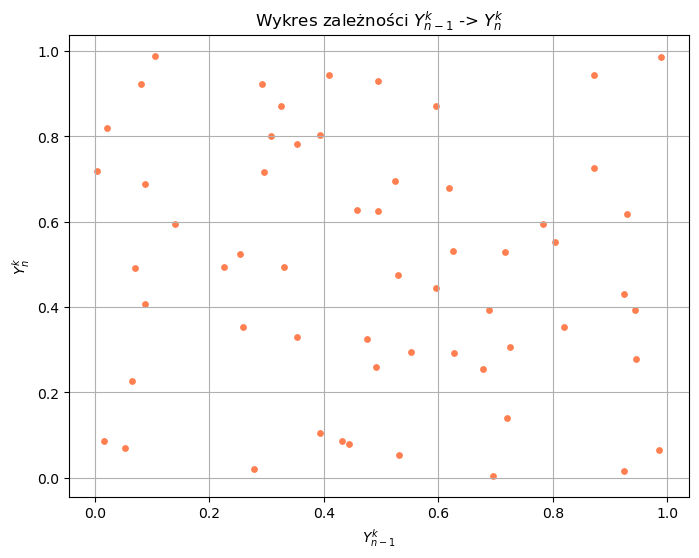

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(acorn_numbers[:-1], acorn_numbers[1:], s=15, color='coral')
plt.title('Wykres zależności $Y_{n-1}^k$ -> $Y_n^k$')
plt.xlabel('$Y_{n-1}^k$')
plt.ylabel('$Y_n^k$')
plt.grid()
plt.show()

### Histogram $Y_n^k$
Wartości wygenerowanych liczb pseudolosowych zawierają się między 0 a 1. Histogram powinien być równomierny. W tej symulacji częstotliwość występowań waha się pomiędzy 1 a 3 razy.

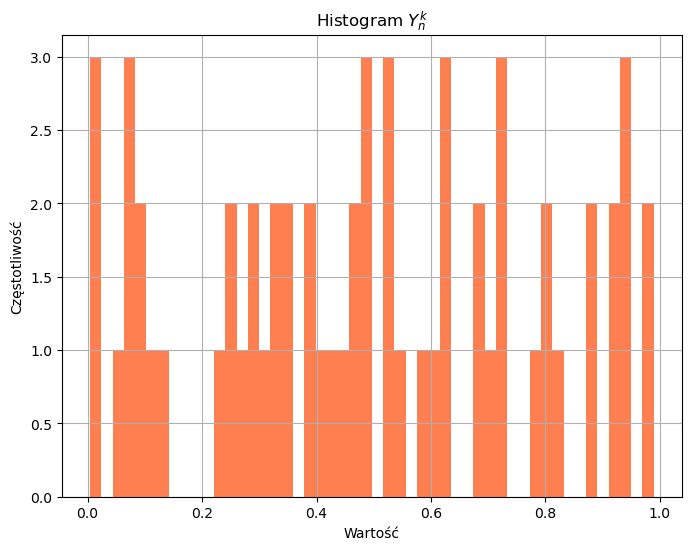

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(acorn_numbers, bins=50, color='coral')
plt.title('Histogram $Y_n^k$')
plt.xlabel('Wartość')
plt.ylabel('Częstotliwość')
plt.grid()
plt.show()

### Porównanie wydajności zaimplementowanego generatora z wbudowanym w NumPy

Zaimplementowany generator liczb pseudolosowych ACORN jest wolniejszy od wbudowanego w NumPy generatora liczb z rozkładu jednostajnego, szczególnie dla dużych prób.

In [7]:
N = [10**3, 10**4, 5*10**4, 10**5, 5*10**5]
numpy_time = np.zeros(len(N))
acorn_time = np.zeros(len(N))

for i,n in enumerate(N):
    
    start = time.time()
    np.random.uniform(size=n)
    numpy_time[i] = time.time() - start

    start2 = time.time()
    ACORN(size=n)
    acorn_time[i] = time.time() - start2

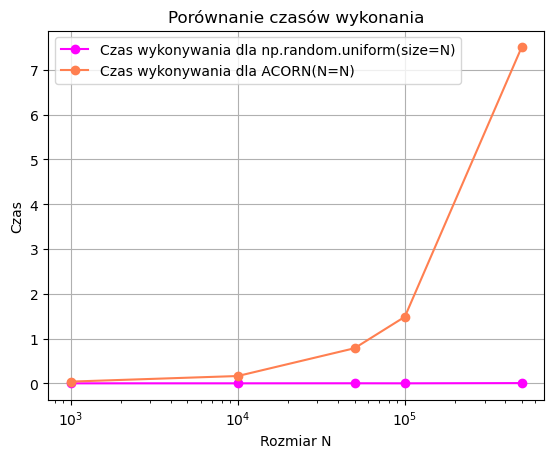

In [8]:
plt.plot(N, numpy_time, marker='o', color='magenta', label='Czas wykonywania dla np.random.uniform(size=N)')
plt.plot(N, acorn_time, marker='o', color='coral', label='Czas wykonywania dla ACORN(N=N)')
plt.title('Porównanie czasów wykonania')
plt.xlabel('Rozmiar N')
plt.ylabel('Czas')
plt.legend()
plt.grid()
plt.xscale('log')
plt.show()